# Baseline Binary Logistic regression Model


In [2]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, balanced_accuracy_score
from sklearn.metrics import log_loss, ConfusionMatrixDisplay, classification_report, roc_curve
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

In [4]:
tz_data = pd.read_csv('final_data/tz_data.csv')

In [51]:
tz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   basin                  59400 non-null  object 
 8   population             59400 non-null  int64  
 9   public_meeting         59400 non-null  bool   
 10  scheme_management      59400 non-null  object 
 11  permit                 59400 non-null  bool   
 12  construction_year      59400 non-null  int64  
 13  extraction_type_class  59400 non-null  object 
 14  payment_type           59400 non-null  object 
 15  qu

In [52]:
data = tz_data.copy()
data

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment_type,quality_group,quantity_group,source,waterpoint_type_group,status_group
0,69572,6000.0,other,1390,other,34.938093,-9.856322,Lake Nyasa,109,True,VWC,False,1999,gravity,annually,good,enough,spring,communal standpipe,2
1,8776,0.0,other,1399,other,34.698766,-2.147466,Lake Victoria,280,True,Other,True,2010,gravity,never pay,good,insufficient,rainwater harvesting,communal standpipe,2
2,34310,25.0,other,686,other,37.460664,-3.821329,Pangani,250,True,VWC,True,2009,gravity,per bucket,good,enough,dam,communal standpipe,2
3,67743,0.0,other,263,other,38.486161,-11.155298,Ruvuma / Southern Coast,58,True,VWC,True,1986,submersible,never pay,good,dry,machine dbh,communal standpipe,0
4,19728,0.0,other,0,other,31.130847,-1.825359,Lake Victoria,0,True,VWC,True,2000,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,other,1210,other,37.169807,-3.253847,Pangani,125,True,Water Board,True,1999,gravity,per bucket,good,enough,spring,communal standpipe,2
59396,27263,4700.0,other,1212,other,35.249991,-9.070629,Rufiji,56,True,VWC,True,1996,gravity,annually,good,enough,river,communal standpipe,2
59397,37057,0.0,Government Of Tanzania,0,DWE,34.017087,-8.750434,Rufiji,0,True,VWC,False,2000,handpump,monthly,fluoride,enough,machine dbh,hand pump,2
59398,31282,0.0,other,0,other,35.861315,-6.378573,Rufiji,0,True,VWC,True,2000,handpump,never pay,good,insufficient,shallow well,hand pump,2


In [53]:
data['permit'] = data['permit'].astype(int)

In [54]:
data['public_meeting'] = data['public_meeting'].astype(int)

In [55]:
data = data.drop('id', axis =1)

In [56]:
data.status_group.value_counts()

status_group
2    32259
0    22824
1     4317
Name: count, dtype: int64

In [57]:
cat_cols = ['funder', 'installer', 'basin', 'scheme_management', 'extraction_type_class', 'payment_type', 'quality_group', 
              'quantity_group', 'source', 'waterpoint_type_group']

num_cols = ['amount_tsh', 'gps_height', 'longitude', 'population', 'public_meeting']

In [58]:
data = pd.get_dummies(data, columns = cat_cols)

In [59]:
bool_columns = data.select_dtypes(include=bool).columns
data[bool_columns] = data[bool_columns].astype(int)

# Target
>- 0 = Non-functional
>- 1 = Functional but needs repair
>- 2 =  Functional
>- Grouping Non-functional and functional that needs repair as 0 and Functional as 1

In [60]:
target_status = {0: 0, 1:1 , 2 : 1}
data['status_group'] = data['status_group'].replace(target_status)

In [61]:
data['status_group'].value_counts()

status_group
1    36576
0    22824
Name: count, dtype: int64

In [62]:
X = data.drop('status_group', axis=1)  
y = data['status_group'] 

In [63]:
data['status_group'].value_counts()

status_group
1    36576
0    22824
Name: count, dtype: int64

In [64]:
print(data["status_group"].value_counts(normalize=True))

status_group
1    0.615758
0    0.384242
Name: proportion, dtype: float64


# Dummy

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Confusion matrix, without normalization
[[    0  7458]
 [    0 12144]]
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


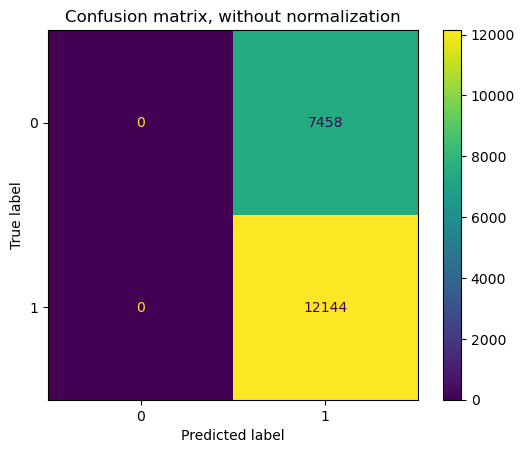

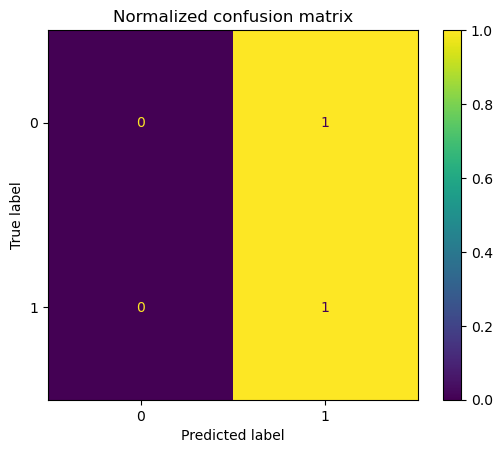

In [67]:
confusion_matrix_options = [("Confusion matrix, without normalization", None),
                            ("Normalized confusion matrix", 'true')]

# Iterate over the options and display the confusion matrix for each
for title, normalize in confusion_matrix_options:
    # Create a dummy classifier with a constant prediction of 1
    dummy_clf = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    
    # Generate the confusion matrix display using the dummy classifier
    disp = ConfusionMatrixDisplay.from_estimator(dummy_clf, X_test, y_test, normalize=normalize)
      
    # Set the title of the confusion matrix display
    disp.ax_.set_title(title)

    # Print the title and the confusion matrix
    print(title)
    print(disp.confusion_matrix)

# Show the plot with all the confusion matrices
plt.show()

In [68]:
dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [69]:
dummy_model.score(X_train, y_train)

0.6139001959897482

In [70]:
dummy_model.score(X_test, y_test)

0.6195286195286195

In [71]:
y_pred = dummy_model.predict(X_test)

In [72]:
y_train.value_counts(normalize=True)

status_group
1    0.6139
0    0.3861
Name: proportion, dtype: float64

In [73]:
dummy_accuracy = accuracy_score(y_test, y_pred)
dummy_accuracy

0.6195286195286195

In [74]:
dummy_recall = recall_score(y_test, y_pred, average=None)
dummy_recall

array([0., 1.])

In [75]:
dummy_precision = precision_score(y_test, y_pred, average=None)
dummy_precision

/Users/danayt/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.61952862])

Text(0.5, 0, 'False Positive Rate')

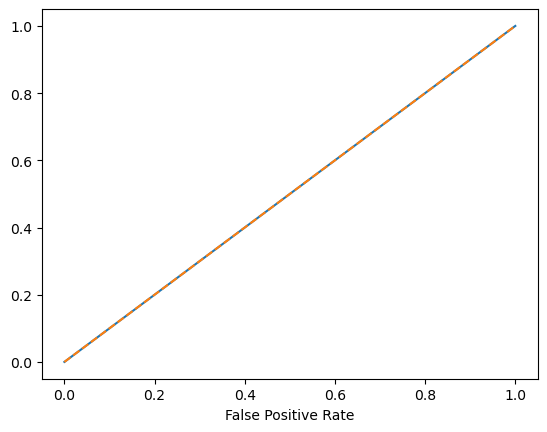

In [76]:
probs = dummy_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')

In [77]:
dummy_f1 = f1_score(y_test, y_pred, average=None)
dummy_f1

array([0.        , 0.76507277])

In [78]:
y_train_pred = dummy_model.predict(X_train)
y_test_pred = dummy_model.predict(X_test)

print("Accuracy:")
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

print("\nBalanced Accuracy:")
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

test_accuracy = balanced_accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Accuracy:
Train Accuracy: 0.6139001959897482
Test Accuracy: 0.6195286195286195

Balanced Accuracy:
Train Accuracy: 0.5
Test Accuracy: 0.5


# Model Evaluation

# LogisticRegression

In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

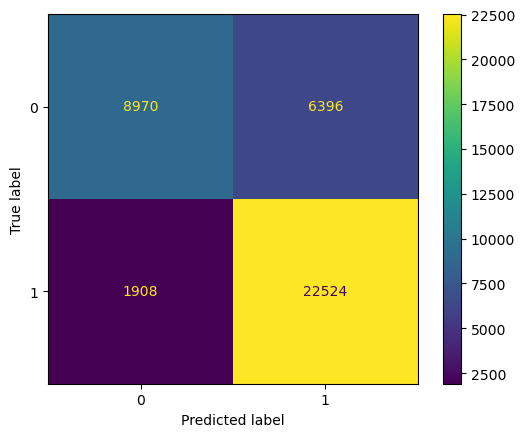

In [80]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
baseline_model = LogisticRegression(random_state=42, max_iter=10000)

# Fit the model on the scaled data
baseline_model.fit(X_train_scaled, y_train)

ConfusionMatrixDisplay.from_estimator(baseline_model, X_train_scaled, y_train);

In [81]:
baseline_neg_log_loss_cv = cross_val_score(estimator=baseline_model, X=X_train_scaled, y=y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.4596086441756679

In [82]:
log_loss(y_train, np.zeros(len(y_train)))

22.12720587976557